In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [43]:
# successful cases
# img = cv2.imread('IMG_1195.jpg')
img = cv2.imread('IMG_1210.jpg')
# img = cv2.imread('IMG_1201.jpg')
# img = cv2.imread('1679655001673.jpg')
# img = cv2.imread('IMG_9718.jpg')
# img = cv2.imread('IMG_1218.jpg')
# img = cv2.imread('IMG_9729.jpg')


In [40]:
# failed cases
# img = cv2.imread('IMG_1189.jpg')
img = cv2.imread('1679655001307.jpg')

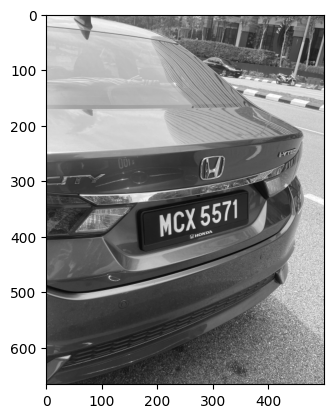

In [44]:
img = imutils.resize(img, width=500)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

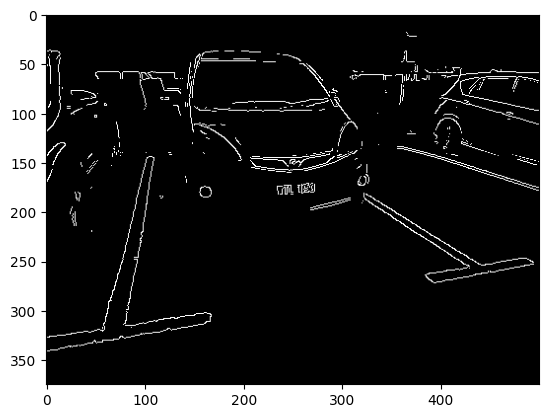

In [42]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 240, 255)

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

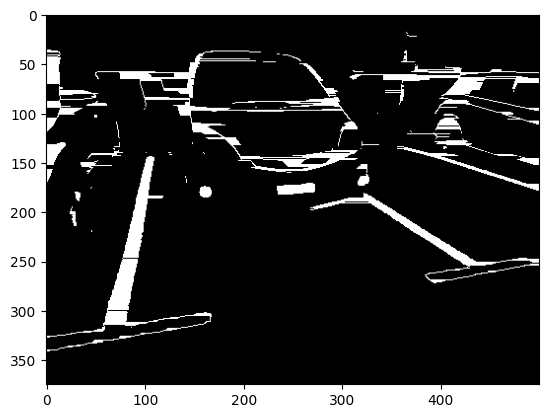

In [33]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 1))
light = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, squareKern)

plt.imshow(cv2.cvtColor(light, cv2.COLOR_BGR2RGB))

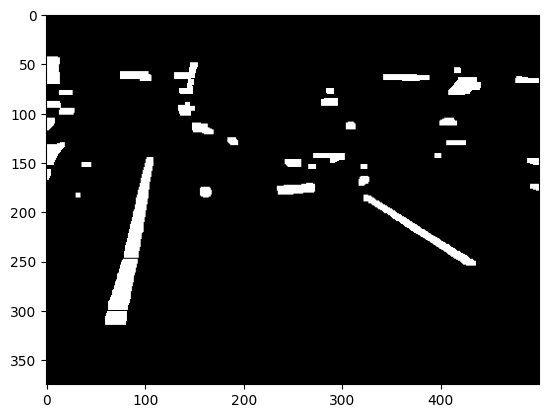

In [34]:
thresh = cv2.erode(light, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

thresh = cv2.bitwise_and(light, light, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [35]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

In [36]:
smtg = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)

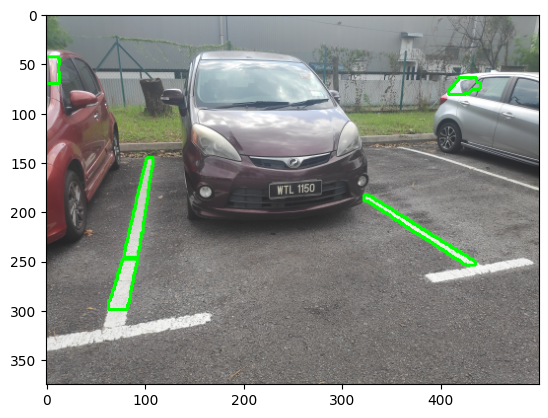

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

30 102
30 52
114 72


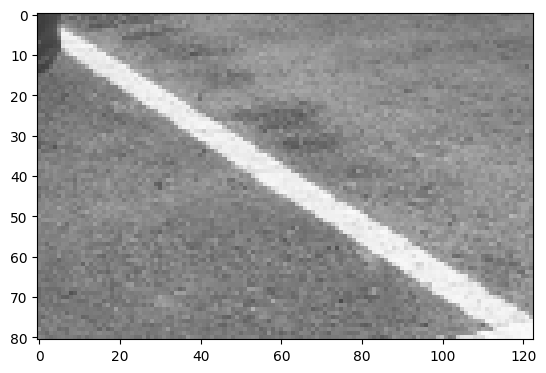

In [38]:
location = None
crop = None
for c in cnts:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    _, _, w, h = cv2.boundingRect(c)
    print(w, h)
    # approx = cv2.approxPolyDP(c, 10, True)
    if len(approx) >= 4 and len(approx) < 10 and w/h > 1.0:
        location = approx
        break
        
if location is not None:
    mask = np.zeros(gray.shape, np.uint8)
    new_img = cv2.drawContours(mask, [location], 0, 255, -1)
    new_img = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    
    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    crop = gray[x1-5:x2+5, y1-5:y2+5]
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
else:
    print("location not found")

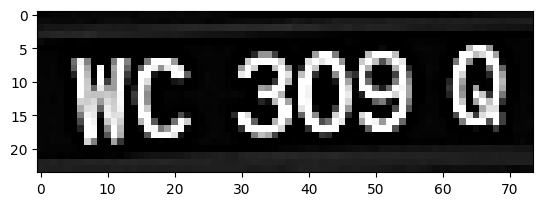

In [29]:
blur = cv2.GaussianBlur(crop, (5,5), 0)

unsharp_image = cv2.addWeighted(crop, 2, blur, -1, 0)
plt.imshow(cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB))

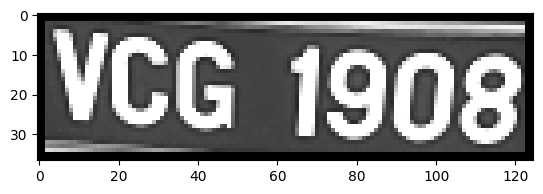

In [16]:
cnts, _ = cv2.findContours(unsharp_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

smtg = cv2.drawContours(unsharp_image, cnts, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(smtg, cv2.COLOR_BGR2RGB))

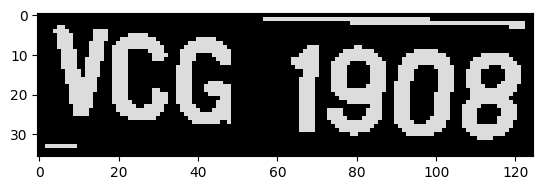

In [17]:
unsharp_image = unsharp_image[1:] 
crop2 = cv2.threshold(unsharp_image, 180, 220, cv2.THRESH_BINARY)[1] 
plt.imshow(cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB))

crop1 = crop[1:]
crop2 = cv2.threshold(crop1, 180, 220, cv2.THRESH_BINARY)[1]
plt.imshow(cv2.cvtColor(crop2, cv2.COLOR_BGR2RGB))

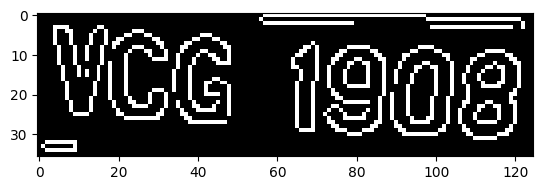

In [18]:
canny = cv2.Canny(crop2, 50, 200)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

In [9]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NameError: name 'crop' is not defined